# Kütüphanelerin İçe Aktarımı

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Veri Setinin İçe Aktarımı

In [2]:
#https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Çıktıya göre Veri Setinin Gruplandırılması

In [7]:
#Şeker hastaları outcome değişkeninde 1 olarak, sağlıklı insanlar 0 olarak temsil ediliyor.

saglikli = df[df.Outcome == 0]
seker_hastasi = df[df.Outcome == 1]
saglikli.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


# Veri Setinin İncelenmesi

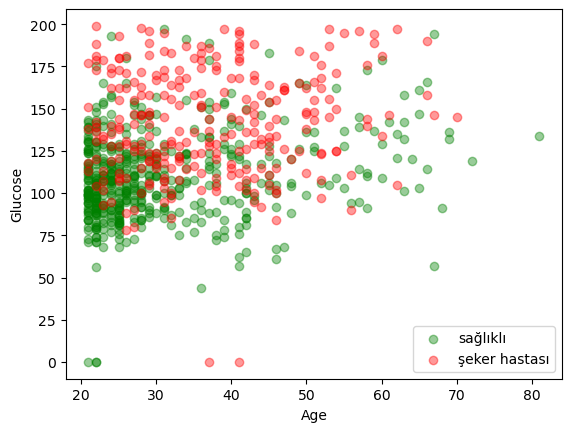

In [6]:
plt.scatter(saglikli.Age, saglikli.Glucose, color ="green", label = "sağlıklı",alpha = 0.4)
plt.scatter(seker_hastasi.Age, seker_hastasi.Glucose, color ="red", label = "şeker hastası",alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

# X ve Y Eksenlerinin Belirlenmesi

In [9]:
#Y değerini outcome (sonuç olarak), X değerini diğer tüm bileşenler olarak ayırmamız gerekiyor. 
y = df.Outcome.values
x_ham_veri = df.drop(["Outcome"], axis = 1)

# Normalizasyon

In [23]:
#Yüksek rakamların küçük rakamları ezmemesi için Normalizasyon işlemi yapılır.
x = (x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

In [24]:
#Normalizasyon öncesi
x_ham_veri.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [25]:
#Normalizasyon sonrası
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


# Train ve Test Verisinin Ayrılması

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# KNN Modelinin Oluşturulması

In [34]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("K = 3 için Test verilerimizin doğrulama testi sonucu: ",knn.score(x_test,y_test))

K = 3 için Test verilerimizin doğrulama testi sonucu:  0.7857142857142857


# Optimize Çalışmaları

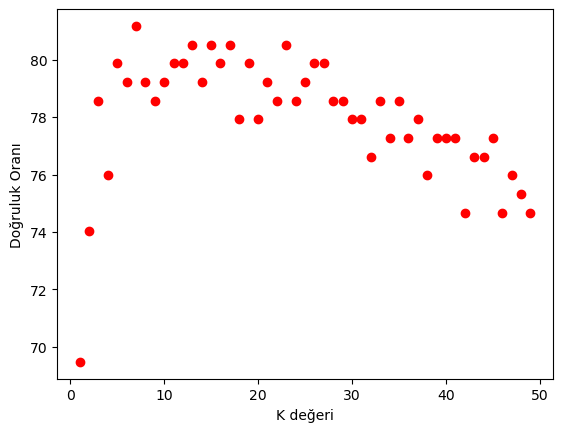

In [37]:
plt.xlabel("K değeri")
plt.ylabel("Doğruluk Oranı")
i=1
for k in range(1,50):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train, y_train)
    plt.scatter(i, (knn_yeni.score(x_test, y_test)*100), color = "red")
    i += 1

Yukarıdaki tabloya göre KNN'i 7 değerinde alınırsa en yüksek doğruluk oranı sağlanıyor.

# Optimizasyon Sonrası Tekrar Modelleme

In [33]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("K = 7 için Test verilerimizin doğrulama testi sonucu: ",knn.score(x_test,y_test))

K=7 için Test verilerimizin doğrulama testi sonucu:  0.8116883116883117
